In [2]:
%%timeit
import pandas as pd
import numpy as np
import radiomics
import matplotlib.pyplot as plt
import cv2
import SimpleITK as sitk
import torch
import radiomics
from radiomics import featureextractor
import os

import sys
sys.path.append('../utils')  # Adjust path as needed (depends on your folder location)

#from radiomics_helper import *

The slowest run took 6.89 times longer than the fastest. This could mean that an intermediate result is being cached.
5.39 μs ± 5.69 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
# Extract radiomic features of AIIMS data

In [3]:
aiims_dir = '../data/mass_data/AIIMS_Delhi_Mass_Data/'

In [4]:
'''
results = []
for file in os.listdir(path = aiims_dir + 'images'):
    if file.lower().endswith(('.tif', '.jpg', '.tiff', '.png')) :
        img = read_as_grayscale(aiims_dir + 'images/' + file)

        if img.shape != (256,256):
            img = cv2.resize(img, (256,256), interpolation = cv2.INTER_LINEAR)
            print('Resized original image')
        #imdisp(img)
    
        file_name = os.path.splitext(os.path.basename(file))[0]
        lab = read_as_grayscale(aiims_dir + 'labels/' + file_name + '.jpg')
        lab = reshape_to(lab, img)
        #imdisp(lab)

        img = sitk.GetImageFromArray(img)
        lab = sitk.GetImageFromArray(lab)
        
        entry = extract_radiomic_features(img, lab)
        entry['id'] = os.path.splitext(os.path.basename(file))[0]
        results.append(entry)
'''

"\nresults = []\nfor file in os.listdir(path = aiims_dir + 'images'):\n    if file.lower().endswith(('.tif', '.jpg', '.tiff', '.png')) :\n        img = read_as_grayscale(aiims_dir + 'images/' + file)\n\n        if img.shape != (256,256):\n            img = cv2.resize(img, (256,256), interpolation = cv2.INTER_LINEAR)\n            print('Resized original image')\n        #imdisp(img)\n    \n        file_name = os.path.splitext(os.path.basename(file))[0]\n        lab = read_as_grayscale(aiims_dir + 'labels/' + file_name + '.jpg')\n        lab = reshape_to(lab, img)\n        #imdisp(lab)\n\n        img = sitk.GetImageFromArray(img)\n        lab = sitk.GetImageFromArray(lab)\n        \n        entry = extract_radiomic_features(img, lab)\n        entry['id'] = os.path.splitext(os.path.basename(file))[0]\n        results.append(entry)\n"

In [5]:
#df = pd.DataFrame(results)
#df.to_csv(aiims_dir + 'radiomics.csv')

In [6]:
# Extract radiomics features of BrEaST data

In [7]:
breast_dir = '../data/mass_data/BrEaST-Lesions_USG-images_and_masks/'

In [8]:
'''
results = []
for file in os.listdir(path = breast_dir + 'images'):
    if file.lower().endswith(('.tif', '.jpg', '.tiff', '.png')) :
        img = read_as_grayscale(breast_dir + 'images/' + file)

        if img.shape != (256,256):
            img = cv2.resize(img, (256,256), interpolation = cv2.INTER_LINEAR)
            print('Resized original image')
        #imdisp(img)
    
        file_name = os.path.splitext(os.path.basename(file))[0]
        if os.path.exists(breast_dir + 'labels/' + file_name + '_tumor.png'):
            lab = read_as_grayscale(breast_dir + 'labels/' + file_name + '_tumor.png')
            lab = reshape_to(lab, img)
            #imdisp(lab)
    
            img = sitk.GetImageFromArray(img)
            lab = sitk.GetImageFromArray(lab)
            
            entry = extract_radiomic_features(img, lab)
            entry['id'] = os.path.splitext(os.path.basename(file))[0]
            results.append(entry)
        else:
            continue
'''

"\nresults = []\nfor file in os.listdir(path = breast_dir + 'images'):\n    if file.lower().endswith(('.tif', '.jpg', '.tiff', '.png')) :\n        img = read_as_grayscale(breast_dir + 'images/' + file)\n\n        if img.shape != (256,256):\n            img = cv2.resize(img, (256,256), interpolation = cv2.INTER_LINEAR)\n            print('Resized original image')\n        #imdisp(img)\n    \n        file_name = os.path.splitext(os.path.basename(file))[0]\n        if os.path.exists(breast_dir + 'labels/' + file_name + '_tumor.png'):\n            lab = read_as_grayscale(breast_dir + 'labels/' + file_name + '_tumor.png')\n            lab = reshape_to(lab, img)\n            #imdisp(lab)\n    \n            img = sitk.GetImageFromArray(img)\n            lab = sitk.GetImageFromArray(lab)\n            \n            entry = extract_radiomic_features(img, lab)\n            entry['id'] = os.path.splitext(os.path.basename(file))[0]\n            results.append(entry)\n        else:\n            cont

In [9]:
#df = pd.DataFrame(results)
#df.to_csv(breast_dir + 'radiomics.csv')

In [10]:
# Read and compare both dataframes - aiims radiomics and breast radiomics

In [11]:
aiims_rad = pd.read_csv(aiims_dir + 'radiomics.csv')
breast_rad = pd.read_csv(breast_dir + 'radiomics.csv')

In [12]:
breast_rad['original_glszm_SizeZoneNonUniformityNormalized'].min()

0.4754722428397663

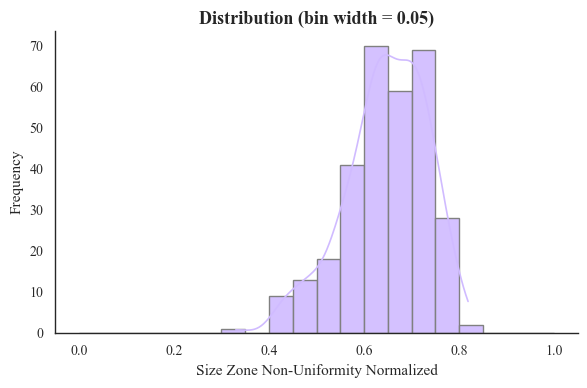

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel palette and academic font
sns.set_palette('pastel')
sns.set_style("white")  # Removes gridlines, keeps axes
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman', 'Georgia', 'Palatino']})

bin_edges = np.arange(0, 1.05, 0.05)

plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=aiims_rad,
    x='original_glszm_SizeZoneNonUniformityNormalized',
    bins=bin_edges,
    kde=True,
    color=sns.color_palette('pastel')[4],
    edgecolor='gray',
    linewidth=1,
    alpha=0.9
)

ax.set_xlabel('Size Zone Non-Uniformity Normalized', fontsize=11, fontname='Times New Roman')
ax.set_ylabel('Frequency', fontsize=11, fontname='Times New Roman')
ax.set_title('Distribution (bin width = 0.05)', fontsize=13, fontweight='semibold', fontname='Times New Roman')
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')
# Axes (spines) are kept. Only top/right removed for minimalism
sns.despine(left=False, bottom=False)
plt.tight_layout(pad=1)
plt.show()


In [72]:
def freq_dist(df, col, xlab, start = 0, end = 1.05, step = 0.05, color = 3):
    # Set pastel palette and academic font
    sns.set_palette('pastel')
    sns.set_style("white")  # Removes gridlines, keeps axes
    plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman', 'Georgia', 'Palatino']})
    
    bin_edges = np.arange(start, end, step)
    
    plt.figure(figsize=(3, 2.25))
    
    ax = sns.histplot(
        data=df,
        x=col,
        bins=bin_edges,
        kde=True,
        color=sns.color_palette('pastel')[color],
        edgecolor='gray',
        linewidth=1,
        alpha=0.9
    )
    
    ax.set_xlabel(xlab, fontsize=11, fontname='Times New Roman')
    ax.set_ylabel('Frequency', fontsize=11, fontname='Times New Roman')
    #ax.set_title('Distribution (bin width = 0.05)', fontsize=13, fontweight='semibold', fontname='Times New Roman')
    plt.xticks(fontsize=10, fontname='Times New Roman')
    plt.yticks(fontsize=10, fontname='Times New Roman')
    # Axes (spines) are kept. Only top/right removed for minimalism
    sns.despine(left=False, bottom=False)
    plt.tight_layout(pad=1)
    plt.show()


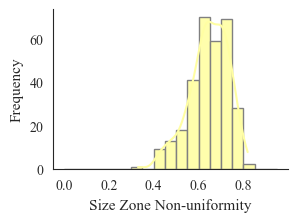

In [123]:
freq_dist(aiims_rad, 'original_firstorder_Skewness', 'Size Zone Non-uniformity', 0, 1, 0.05, 8)

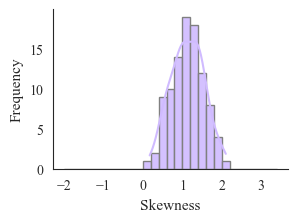

In [164]:
freq_dist(brdf, 'original_firstorder_Skewness', 'Skewness', -2, 3.5, 0.2, 4)

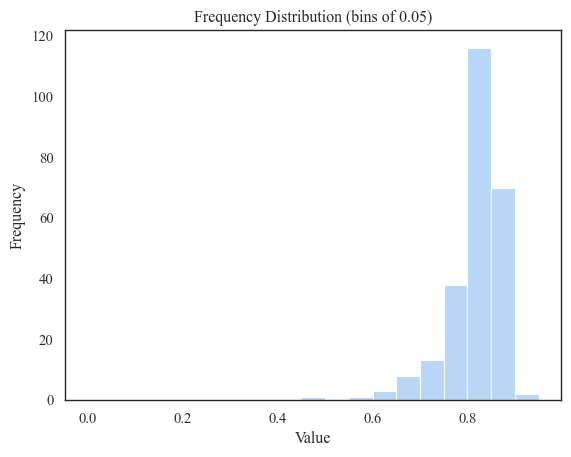

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe column is called 'value_column'
# For example:
# df = pd.DataFrame({'value_column': np.random.uniform(0, 1, 100)})

bin_edges = np.arange(0, 1, 0.05)  # Bin edges from 0 to 1, width 0.05

sns.histplot(
    data=breast_rad,
    x='original_glszm_SizeZoneNonUniformityNormalized',
    bins=bin_edges,
    kde=False  # Set to True if you want to add a KDE curve
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution (bins of 0.05)')
plt.show()


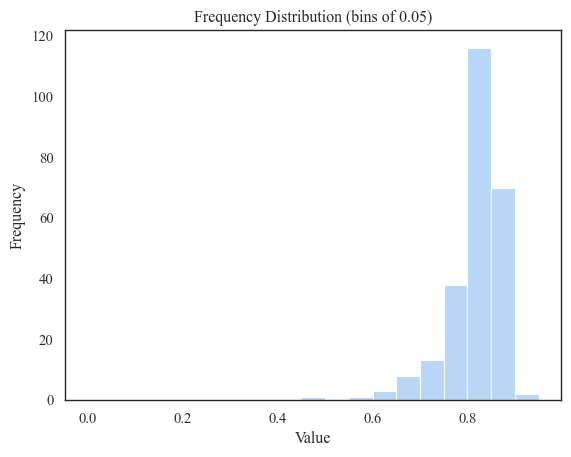

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe column is called 'value_column'
# For example:
# df = pd.DataFrame({'value_column': np.random.uniform(0, 1, 100)})

bin_edges = np.arange(0, 1, 0.05)  # Bin edges from 0 to 1, width 0.05

sns.histplot(
    data=breast_rad,
    x='original_glszm_SizeZoneNonUniformityNormalized',
    bins=bin_edges,
    kde=False  # Set to True if you want to add a KDE curve
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution (bins of 0.05)')
plt.show()


In [72]:
for i in aiims_rad.columns:
    print(i)

Unnamed: 0
original_shape2D_Elongation
original_shape2D_MajorAxisLength
original_shape2D_MaximumDiameter
original_shape2D_MeshSurface
original_shape2D_MinorAxisLength
original_shape2D_Perimeter
original_shape2D_PerimeterSurfaceRatio
original_shape2D_PixelSurface
original_shape2D_Sphericity
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Uniformity
original_firstorder_Variance
original_glcm_Autocorrelation
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contra

In [73]:
breast_rad.describe()

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.639045,89.854583,93.957185,4342.688492,54.830688,278.085511,0.092868,4343.210317,0.787088,...,924.958000,0.009089,6.052199,0.883397,0.825944,0.135046,0.009951,7250.968994,0.146187,37.315223
std,72.890329,0.174072,44.284549,45.725011,4146.248808,26.575109,142.782701,0.041584,4146.248112,0.093977,...,473.399355,0.013116,0.324083,0.079448,4.174528,0.180666,0.008991,3199.812716,0.071350,31.836232
min,0.000000,0.209027,25.387778,27.658633,354.500000,13.553475,81.455844,0.024574,355.000000,0.479870,...,115.201619,0.000886,5.131041,0.365304,0.050831,0.009430,0.000769,743.575137,0.022716,3.346038
25%,62.750000,0.490889,55.305394,57.923329,1456.250000,34.202658,167.059921,0.061477,1456.750000,0.744266,...,583.440491,0.002924,5.836340,0.885358,0.102548,0.040576,0.003661,4803.038192,0.093174,15.854374
50%,125.500000,0.666295,80.052391,83.491888,3138.500000,49.289912,244.429978,0.084394,3139.000000,0.801224,...,864.111442,0.004900,6.086216,0.904960,0.133253,0.078654,0.006499,7150.189751,0.137220,26.646119
75%,188.250000,0.778821,116.723846,125.330217,5821.250000,68.983768,370.891919,0.116914,5821.750000,0.856957,...,1214.768544,0.008522,6.258737,0.917772,0.184267,0.153503,0.014050,9454.052109,0.181821,49.127395
max,251.000000,0.987432,275.181839,265.107525,30056.500000,145.168406,789.068109,0.248817,30057.000000,0.934456,...,2703.164155,0.093258,6.854476,0.953823,43.927337,1.107037,0.054729,17629.388523,0.381638,220.196603


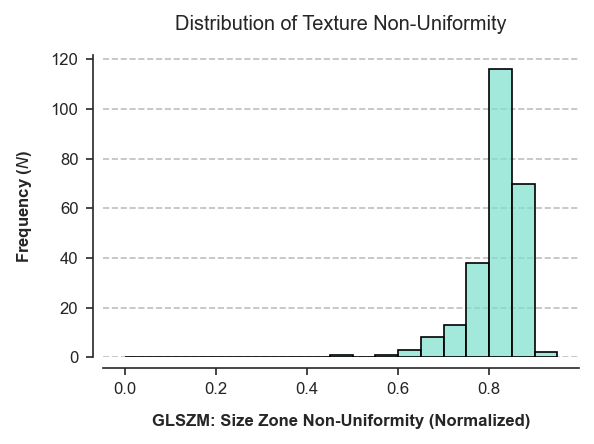

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Setup Mock Data (Uncomment if you need to test without your data) ---
# np.random.seed(42)
# breast_rad = pd.DataFrame({
#     'original_glszm_SizeZoneNonUniformityNormalized': np.random.beta(2, 5, 300)
# })

# --- 2. Enforce Georgia Font and Define Sizes ---
# The font family MUST be set before any plotting command.
plt.rcParams.update({
    "font.family": "serif",
    # Prioritize Georgia. If this fails, Times New Roman is a backup.
    "font.serif": ["Georgia", "Times New Roman", "DejaVu Serif"],
    "axes.labelsize": 8,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
})

# Use seaborn ticks style for a clean look
sns.set_style("ticks") 

# --- 3. The Plotting Logic ---

# Set figure size 
plt.figure(figsize=(4, 3), dpi=150)

bin_edges = np.arange(0, 1, 0.05)

# Plot with aesthetic adjustments
ax = sns.histplot(
    data=breast_rad,
    x='original_glszm_SizeZoneNonUniformityNormalized',
    bins=bin_edges,
    kde=False,
    stat="count",           
    color="#7de0cc",        
    edgecolor="black",      
    linewidth=0.8,          
    alpha=0.7               
)

# --- 4. Formatting Labels and Grid ---

# Add a subtle grid behind the plot elements
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
ax.set_axisbelow(True)

# Clean up labels - the Georgia font specified in rcParams will be used here
plt.xlabel('GLSZM: Size Zone Non-Uniformity (Normalized)', fontweight='bold', labelpad=8)
plt.ylabel('Frequency ($N$)', fontweight='bold', labelpad=8)
plt.title('Distribution of Texture Non-Uniformity', pad=12)

# Remove the top and right frame lines (spines)
sns.despine(offset=5, trim=False) 

# Tight layout handles padding automatically
plt.tight_layout()

# --- 5. Display Plot ---
plt.show()

In [79]:
import matplotlib
print(matplotlib.get_cachedir())

C:\Users\Chinmay\.matplotlib


In [29]:
br = pd.read_excel(breast_dir + 'clinical_data.xlsx')

In [30]:
br

,CaseID,Image_filename,Mask_tumor_filename,Mask_other_filename,Pixel_size,Age,Tissue_composition,Signs,Symptoms,Shape,...,Echogenicity,Posterior_features,Halo,Calcifications,Skin_thickening,Interpretation,BIRADS,Verification,Diagnosis,Classification
0,1,case001.png,case001_tumor.png,NaN,0.007812,57,heterogeneous: predominantly fat,breast scar,family history of breast/ovarian cancer,irregular,...,heterogeneous,shadowing,no,no,yes,Breast scar (surgery)&Breast scar (radiotherapy),2,confirmed by follow-up care,not applicable,benign
1,2,case002.png,case002_tumor.png,NaN,0.006462,not available,homogeneous: fat,not available,not available,oval,...,hypoechoic,no,no,no,no,Dysplasia&Fibroadenoma,4b,confirmed by biopsy,Intramammary lymph node,benign
2,3,case003.png,case003_tumor.png,NaN,0.006944,56,heterogeneous: predominantly fat,no,nipple discharge,oval,...,hyperechoic,no,no,no,no,Duct filled with thick fluid&Intraductal papil...,4a,confirmed by biopsy,Usual ductal hyperplasia (UDH)&Pseudoangiomato...,benign
3,4,case004.png,case004_tumor.png,NaN,0.007812,43,homogeneous: fibroglandular,no,no,round,...,hypoechoic,no,no,no,no,Cyst filled with thick fluid,3,confirmed by follow-up care,not applicable,benign
4,5,case005.png,case005_tumor.png,NaN,0.007812,67,homogeneous: fat,nipple retraction&palpable,family history of breast/ovarian cancer,oval,...,complex cystic/solid,enhancement,no,no,no,Suspicion of malignancy&Intraductal papilloma,4b,confirmed by biopsy,Encapsulated papillary carcinoma&Ductal carcin...,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,case252.png,case252_tumor.png,NaN,0.006944,18,homogeneous: fibroglandular,palpable,no,oval,...,hypoechoic,no,no,no,no,Fibroadenoma,4a,confirmed by biopsy,Fibroadenoma,benign
252,253,case253.png,case253_tumor.png,NaN,0.007812,64,homogeneous: fat,palpable&breast scar,family history of breast/ovarian cancer,oval,...,anechoic,enhancement,no,no,yes,Fat necrosis&Breast scar (surgery),2,confirmed by follow-up care,not applicable,benign
253,254,case254.png,case254_tumor.png,NaN,0.007812,57,heterogeneous: predominantly fat,no,no,irregular,...,hypoechoic,shadowing,no,no,no,Suspicion of malignancy,5,confirmed by biopsy,Invasive carcinoma of no special type (NST)&Du...,malignant
254,255,case255.png,case255_tumor.png,NaN,0.006944,42,heterogeneous: predominantly fibroglandular,palpable,family history of breast/ovarian cancer,irregular,...,heterogeneous,shadowing,no,intraductal,no,Suspicion of malignancy&Mastitis,4c,confirmed by biopsy,Ductal carcinoma in situ (DCIS),malignant


In [31]:
br['id'] = br['Image_filename'].astype(str).str.replace(r'\.png$', '', regex=True)

In [34]:
breast_rad

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,id
0,0,0.425008,160.156861,165.302753,4745.5,68.067903,493.244733,0.103939,4746.0,0.495089,...,0.001552,6.326884,0.917404,0.105812,0.045964,0.005402,11541.818402,0.097691,37.425615,case001
1,1,0.842817,49.272575,50.328918,1589.5,41.527748,154.953319,0.097486,1590.0,0.912083,...,0.005021,6.057387,0.886792,0.165263,0.027797,0.014928,4912.354911,0.098216,53.424679,case002
2,2,0.209027,91.702073,86.052310,1203.5,19.168212,202.911688,0.168601,1204.0,0.606067,...,0.005467,6.204654,0.887043,0.227230,0.026167,0.018599,8149.159552,0.184342,123.044672,case003
3,3,0.874813,28.127218,29.832868,537.5,24.606042,89.455844,0.166429,538.0,0.918725,...,0.010462,5.567864,0.905204,0.130717,0.034009,0.026300,6457.515712,0.192948,168.634201,case004
4,4,0.702873,148.831707,159.012578,12027.5,104.609841,442.735065,0.036810,12028.0,0.878110,...,0.010101,6.167913,0.858996,0.229346,0.312264,0.001757,6847.681030,0.139224,7.291516,case005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0.372394,126.847085,123.308556,4646.5,47.237137,311.379726,0.067014,4647.0,0.776028,...,0.002414,6.122778,0.901442,0.203849,0.070527,0.004324,8020.739205,0.110004,19.002736,case252
248,248,0.483994,182.867812,177.589414,12110.5,88.506902,484.717821,0.040025,12111.0,0.804817,...,0.010673,5.171855,0.792007,0.371713,0.919686,0.000810,6336.047142,0.035649,14.064320,case253
249,249,0.673525,57.457905,62.289646,1682.5,38.699339,178.852814,0.106302,1683.0,0.812993,...,0.004492,6.444107,0.927510,0.087422,0.027181,0.016974,7622.468084,0.193509,55.763385,case254
250,250,0.390235,157.459699,147.959454,6686.5,61.446270,453.989899,0.067896,6687.0,0.638496,...,0.002519,6.441266,0.923434,0.096121,0.111431,0.004037,7050.041215,0.175124,11.785384,case255


In [37]:
brdf = br.merge(breast_rad, how = 'left', on = 'id')

In [40]:
brdf = brdf[brdf['Classification'] == 'malignant']

In [216]:
am = pd.read_excel(aiims_dir + 'clinical_data.xlsx')


In [217]:
am = am.rename(columns = {'S. No.':'Patient_id'})
am

,Patient_id,Name,UHID,Date,IRCH,Gender,Age,H/P date,side,ER,...,CT,RT,LAST FOLLOW UP,ALIVE,DEAD,mets within 3 years,Unnamed: 22,RISK_FACTOR,Unnamed: 24,Unnamed: 25
0,1,aasha,100331502.0,2018-03-20,152644.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,aiyemma samuel,103647573.0,2018-03-27,211753.0,F,70,2018-05-01 00:00:00,RIGHT,NEGATIVE,...,NO,NO,2023-10-16 00:00:00,YES,NO,NaN,NaN,NaN,NaN,NaN
2,3,alka,105440127.0,2021-06-18,256714.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,anita,104206700.0,2018-12-27,222081.0,NaN,46,2019-01-12 00:00:00,RIGHT,POSITIVE,...,YES,YES,2023-07-17 00:00:00,YES,NO,METAS IN LEFT BRAEST,NaN,NaN,NaN,NaN
4,5,anjana rathore,102847610.0,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,183,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,184,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
aiims_rad = pd.read_csv(aiims_dir + 'radiomics.csv')


In [220]:
aiims_rad['Patient_id'] = aiims_rad['id'].astype(str).str.split('_').str[0]

In [222]:
aiims_rad

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,id,Patient_id
0,0,0.743493,91.419133,96.046864,4694.0,67.969462,368.166522,0.078433,4696.0,0.659678,...,5.959156,0.791951,0.396972,0.118270,0.009095,1067.294801,0.038941,14.772725,1,1
1,1,0.868326,114.976627,140.890028,6607.5,99.837184,743.244733,0.112485,6613.0,0.387696,...,6.523592,0.640254,1.334976,0.112669,0.007755,1694.748057,0.026960,37.674046,10,10
2,2,0.589770,117.509307,118.088950,6125.0,69.303440,410.450793,0.067012,6128.0,0.675922,...,5.647404,0.852970,0.213065,0.357647,0.002586,1806.098492,0.161877,2.851824,100_1,100
3,3,0.368403,266.818328,262.392835,17732.5,98.296787,1051.612265,0.059304,17741.0,0.448884,...,5.672723,0.833775,0.241825,0.749715,0.001003,2400.820641,0.065757,2.020294,100_2,100
4,4,0.702478,132.582908,141.421356,9614.0,93.136555,511.462987,0.053200,9619.0,0.679583,...,5.602476,0.829608,0.253430,0.381243,0.001564,3433.295668,0.061657,5.368264,100_3,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,0.741589,208.705068,215.615398,25050.0,154.773341,837.570635,0.033436,25057.0,0.669865,...,5.855140,0.829828,0.331342,0.755060,0.000864,3531.876101,0.050679,3.067589,97_1,97
306,306,0.630186,237.332396,252.744931,27164.5,149.563662,968.724963,0.035661,27174.0,0.603122,...,5.723000,0.801465,0.916414,1.386844,0.000638,4397.903579,0.104992,3.156065,97_2,97
307,307,0.924143,134.980395,154.175225,12412.5,124.741141,645.546248,0.052008,12415.0,0.611797,...,6.255774,0.682159,0.967933,0.300214,0.003175,1342.594450,0.029254,9.440396,99,99
308,308,0.818203,73.711676,81.055537,3232.0,60.311147,308.994949,0.095605,3235.0,0.652213,...,6.592158,0.670788,1.489546,0.076861,0.019251,865.148432,0.070174,32.467193,9_1,9


In [225]:
df = am.merge(aiims_rad, on = 'Patient_id', how = 'left')
df

,Patient_id,Name,UHID,Date,IRCH,Gender,Age,H/P date,side,ER,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,id
0,1,aasha,100331502.0,2018-03-20,152644.0,NaN,NaN,NaN,NaN,NaN,...,0.006150,5.959156,0.791951,0.396972,0.118270,0.009095,1067.294801,0.038941,14.772725,1
1,2,aiyemma samuel,103647573.0,2018-03-27,211753.0,F,70,2018-05-01 00:00:00,RIGHT,NEGATIVE,...,0.010690,6.138952,0.800134,0.439421,0.069074,0.007539,6571.711711,0.049157,102.522364,2_1
2,2,aiyemma samuel,103647573.0,2018-03-27,211753.0,F,70,2018-05-01 00:00:00,RIGHT,NEGATIVE,...,0.009565,6.237757,0.815435,0.379092,0.076380,0.009766,2779.461869,0.058424,34.848892,2_2
3,3,alka,105440127.0,2021-06-18,256714.0,NaN,NaN,NaN,NaN,NaN,...,0.002410,6.969941,0.714168,0.835481,0.169296,0.001464,3247.828125,0.041909,6.559308,3
4,4,anita,104206700.0,2018-12-27,222081.0,NaN,46,2019-01-12 00:00:00,RIGHT,POSITIVE,...,0.002638,6.066895,0.805205,0.364774,0.056983,0.006183,4356.794998,0.030462,53.555243,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,181,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,182,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,183,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,184,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
am[am['Patient_id'].isin(df[~df['id'].isnull()]['Patient_id'])].to_csv('available_mass_images_labels.csv')

In [138]:
amdf = aiims_rad.merge(am, on = 'Patient_id', how = 'left')

In [224]:
am['Patient_id'] = am['Patient_id'].astype(str)

In [141]:
amdf['Age'].mean()

45.830357142857146

In [147]:
#brdf['Age'] = brdf['Age'].astype(int)
brdf[brdf['Age'].fillna('').astype(str).str.isdigit()]['Age'].mean()

60.94186046511628

In [142]:
brdf.columns

Index(['CaseID', 'Image_filename', 'Mask_tumor_filename',
       'Mask_other_filename', 'Pixel_size', 'Age', 'Tissue_composition',
       'Signs', 'Symptoms', 'Shape',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=125)

In [156]:
brdf.describe()[['original_shape2D_Elongation', 'original_shape2D_Sphericity', 'original_firstorder_Entropy', 'original_firstorder_Skewness', 'original_firstorder_Kurtosis', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glszm_SizeZoneNonUniformityNormalized' ]]

,original_shape2D_Elongation,original_shape2D_Sphericity,original_firstorder_Entropy,original_firstorder_Skewness,original_firstorder_Kurtosis,original_glcm_Contrast,original_glcm_Correlation,original_glszm_SizeZoneNonUniformityNormalized
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.685598,0.751963,5.602198,1.129621,4.654739,24.147766,0.940070,0.821796
std,0.159757,0.087840,0.396165,0.414994,1.520162,10.321576,0.024245,0.043690
min,0.316947,0.479870,4.024041,0.171916,2.218021,7.390694,0.864512,0.666522
25%,0.555592,0.698803,5.431704,0.860263,3.580271,15.620297,0.925064,0.798628
50%,0.704836,0.768245,5.646284,1.100130,4.238275,23.500875,0.943468,0.833469
75%,0.808684,0.814207,5.854804,1.405388,5.598376,29.967635,0.961078,0.851887
max,0.987432,0.896281,6.430395,2.100257,8.549508,65.245602,0.979408,0.886141


In [155]:
amdf.describe()[['original_shape2D_Elongation', 'original_shape2D_Sphericity', 'original_firstorder_Entropy', 'original_firstorder_Skewness', 'original_firstorder_Kurtosis', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glszm_SizeZoneNonUniformityNormalized' ]]

,original_shape2D_Elongation,original_shape2D_Sphericity,original_firstorder_Entropy,original_firstorder_Skewness,original_firstorder_Kurtosis,original_glcm_Contrast,original_glcm_Correlation,original_glszm_SizeZoneNonUniformityNormalized
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.655598,0.587667,5.268835,0.801753,4.184843,6.524527,0.972320,0.646381
min,0.186032,0.328850,3.535474,-0.567343,1.613807,0.717501,0.650658,0.330131
25%,0.546546,0.525477,4.971815,0.452548,2.959129,3.379955,0.966673,0.596993
50%,0.664583,0.602163,5.306620,0.758535,3.657733,5.335370,0.978758,0.651501
75%,0.778010,0.663163,5.611411,1.159414,4.727504,7.745365,0.986735,0.710927
max,0.987861,0.789028,6.568373,2.838509,15.270591,53.827103,0.996741,0.818747
std,0.165622,0.094500,0.480099,0.564424,1.963062,5.402061,0.030778,0.086849


In [152]:
for i in aiims_rad.columns:
    print(i)

Unnamed: 0
original_shape2D_Elongation
original_shape2D_MajorAxisLength
original_shape2D_MaximumDiameter
original_shape2D_MeshSurface
original_shape2D_MinorAxisLength
original_shape2D_Perimeter
original_shape2D_PerimeterSurfaceRatio
original_shape2D_PixelSurface
original_shape2D_Sphericity
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Uniformity
original_firstorder_Variance
original_glcm_Autocorrelation
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contra

In [165]:
#ALN

In [180]:
import os

In [188]:
aln_dir = '../../AIIMS_Delhi/DL/data/'

In [198]:
dfdic = []
for file in os.listdir(aln_dir):
    if file.split('.')[-1] in ['png', 'jpg', 'tif', 'tiff', 'jpeg']:
        im = read_as_grayscale(aln_dir + file)
        mask = np.ones(im.shape)
        mask[0,0] = 0
        im = sitk.GetImageFromArray(im)
        mask = sitk.GetImageFromArray(mask)
        result = extract_radiomic_features(im, mask)
        result['id'] = file.split('.')[0]
        dfdic.append(result)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [199]:
aln = pd.DataFrame(dfdic)

In [200]:
aln

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,id
0,0.688710,296.749344,311.4883625434504,45487.5,204.374315,866.2426406871193,0.019043531534753928,45488.0,0.872793,-110.81474873797109,...,0.0029042368115455154,7.085531345339279,0.7629924375659515,0.6380300506921421,0.25892686809492105,0.0019010133235173381,2650.2441840439715,0.06848558760106349,7.466495240469931,100_1_cropped
1,0.475386,211.293986,202.20039564748632,15919.5,100.446213,538.2426406871193,0.0338102729788699,15920.0,0.830982,-118.11737287627008,...,0.0021983896232980298,6.682657756131966,0.8494346733668342,0.27110280244881646,0.17901624687183276,0.002427375797874003,5115.355117734896,0.16122749638282957,9.625258396330585,100_2_cropped
2,0.908493,176.657271,206.0412580043133,21265.5,160.491826,582.2426406871193,0.02737968261677926,21266.0,0.887848,-119.02544410084062,...,0.0018244922414149324,6.969176669177772,0.8196181698485846,0.3041750939500975,0.15574143633805898,0.0022984158968758525,4983.3684268644,0.10695812579116004,9.737205393543073,100_3_cropped
3,0.838980,272.501124,307.4166553718259,46726.5,228.622970,866.2426406871193,0.018538573201226698,46727.0,0.884600,-127.42723734360881,...,0.0029746113641083457,7.010531189847848,0.8136623365506024,0.31764862744240757,0.3347562826972036,0.001062294826451189,4831.011669129603,0.1091936155766339,4.359002938199362,100_4_cropped
4,0.579897,252.867813,252.65985039178662,27811.5,146.637272,690.2426406871193,0.02481860527792889,27812.0,0.856476,-116.10666167752441,...,0.0005935625214610539,7.17458985649188,0.7777578023874586,0.566723493818161,0.04339700038716313,0.004108808068935553,2883.6415950280916,0.033762579156074,21.92036743775747,109_cropped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.934853,354.487202,419.57716811094474,88107.5,331.393319,1186.2426406871193,0.013463583017190583,88108.0,0.887029,-134.35284944943703,...,0.0007627369706700955,7.453424037320347,0.7011735597221592,0.8749914338702283,0.13717112185788224,0.0014479862763743143,2397.862316060997,0.03791769485981992,6.149311333968238,P_98_3_cropped
108,0.961914,1182.411619,1420.1521045296522,1008638.5,1137.378320,4016.242640687119,0.003981845468606561,1008639.0,0.886447,-132.81709590546745,...,0.0005591361124187114,8.446532782508452,0.44182110745271597,3.5418441408233865,1.2509127376236555,0.0001759112814695943,1664.5275772821947,0.02963788321424429,0.6844970666308333,P_98_4_cropped
109,0.489880,228.616065,220.04544985070697,19204.5,111.994344,588.2426406871193,0.030630458522071354,19205.0,0.835122,-126.60393060937278,...,0.0005708606531880502,7.008436460088856,0.8268159333506899,0.3570337712136521,0.04789645230910325,0.0039483322536496635,4313.8641918375415,0.0555750435685019,19.769243979378736,P_98_5_cropped
110,0.489047,474.574813,457.0787678289159,82609.5,232.089168,1222.2426406871193,0.014795424747603113,82610.0,0.833609,-132.44792415315487,...,0.0006950385848633192,7.189647997541946,0.7841665657910665,0.5506095058859773,0.16262160055654556,0.0010942631542077798,3639.87154300112,0.04551053692342799,5.561788527476559,P_99_1_cropped


In [205]:
lab = pd.read_csv('../../AIIMS_Delhi/DL/labels/labels.csv')
lab['new_id'] = lab['images'].astype(str).str.split('\\').str[-1]

In [207]:
lab = lab.rename(columns = {'id':'Patient_id'})
lab

,Unnamed: 0,Patient_id,mets,images,new_id
0,0,11,YES,Cropped_Clean_Data\11_cropped.png,11_cropped.png
1,1,61,YES,Cropped_Clean_Data\61_1_cropped.png,61_1_cropped.png
2,2,76,YES,Cropped_Clean_Data\76_cropped.png,76_cropped.png
3,3,89,YES,Cropped_Clean_Data\89_1_cropped.png,89_1_cropped.png
4,4,89,YES,Cropped_Clean_Data\89_2_cropped.png,89_2_cropped.png
...,...,...,...,...,...
107,107,P_98,YES,Cropped_Clean_Data\P_98_5_cropped.png,P_98_5_cropped.png
108,108,P_99,YES,Cropped_Clean_Data\P_99_1_cropped.png,P_99_1_cropped.png
109,109,P_99,YES,Cropped_Clean_Data\P_99_2_cropped.png,P_99_2_cropped.png
110,110,P_100,NO,Cropped_Clean_Data\P_100_1_cropped.png,P_100_1_cropped.png


In [208]:
lab['id'] = lab['new_id'].astype(str).str.split('.').str[0]
lab

,Unnamed: 0,Patient_id,mets,images,new_id,id
0,0,11,YES,Cropped_Clean_Data\11_cropped.png,11_cropped.png,11_cropped
1,1,61,YES,Cropped_Clean_Data\61_1_cropped.png,61_1_cropped.png,61_1_cropped
2,2,76,YES,Cropped_Clean_Data\76_cropped.png,76_cropped.png,76_cropped
3,3,89,YES,Cropped_Clean_Data\89_1_cropped.png,89_1_cropped.png,89_1_cropped
4,4,89,YES,Cropped_Clean_Data\89_2_cropped.png,89_2_cropped.png,89_2_cropped
...,...,...,...,...,...,...
107,107,P_98,YES,Cropped_Clean_Data\P_98_5_cropped.png,P_98_5_cropped.png,P_98_5_cropped
108,108,P_99,YES,Cropped_Clean_Data\P_99_1_cropped.png,P_99_1_cropped.png,P_99_1_cropped
109,109,P_99,YES,Cropped_Clean_Data\P_99_2_cropped.png,P_99_2_cropped.png,P_99_2_cropped
110,110,P_100,NO,Cropped_Clean_Data\P_100_1_cropped.png,P_100_1_cropped.png,P_100_1_cropped


In [210]:
alndf = lab.merge(aln, how = 'left', on = 'id')

In [213]:
alndf[alndf['mets'] == 'YES'].describe()

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MinorAxisLength,original_shape2D_PixelSurface,original_shape2D_Sphericity
count,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000
mean,55.680412,0.700502,776.394027,535.157438,4.043261e+05,0.863518
std,32.390696,0.177186,427.349243,332.433734,3.586977e+05,0.026781
min,0.000000,0.339843,173.191881,100.446213,1.592000e+04,0.771681
25%,27.000000,0.545898,347.556015,237.862151,6.119900e+04,0.847610
50%,58.000000,0.703125,1182.409517,406.451831,3.604470e+05,0.873098
75%,82.000000,0.838867,1182.411195,834.846568,7.403510e+05,0.883968
max,109.000000,0.999997,1182.413351,1182.409975,1.048575e+06,0.888422


In [214]:
alndf[alndf['mets'] == 'NO'].describe()

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MinorAxisLength,original_shape2D_PixelSurface,original_shape2D_Sphericity
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,54.333333,0.739167,556.481170,389.820007,242343.000000,0.868188
std,34.148137,0.179164,411.245341,301.100390,318576.608866,0.030507
min,10.000000,0.366258,125.846871,124.691794,11771.000000,0.786332
25%,36.500000,0.706099,264.993313,161.072613,33705.500000,0.874342
50%,40.000000,0.736328,421.459889,312.918586,98914.000000,0.877152
75%,88.000000,0.865597,858.515986,451.484627,299683.500000,0.884700
max,111.000000,0.990822,1182.411510,1040.383420,922623.000000,0.889764


In [215]:
amdf

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,CT,RT,LAST FOLLOW UP,ALIVE,DEAD,mets within 3 years,Unnamed: 22,RISK_FACTOR,Unnamed: 24,Unnamed: 25
0,0,0.743493,91.419133,96.046864,4694.0,67.969462,368.166522,0.078433,4696.0,0.659678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.868326,114.976627,140.890028,6607.5,99.837184,743.244733,0.112485,6613.0,0.387696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.589770,117.509307,118.088950,6125.0,69.303440,410.450793,0.067012,6128.0,0.675922,...,YES,NO,0-0-2021,NaN,NaN,METS(10-6-21),NaN,NaN,NaN,NaN
3,3,0.368403,266.818328,262.392835,17732.5,98.296787,1051.612265,0.059304,17741.0,0.448884,...,YES,NO,0-0-2021,NaN,NaN,METS(10-6-21),NaN,NaN,NaN,NaN
4,4,0.702478,132.582908,141.421356,9614.0,93.136555,511.462987,0.053200,9619.0,0.679583,...,YES,NO,0-0-2021,NaN,NaN,METS(10-6-21),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,0.741589,208.705068,215.615398,25050.0,154.773341,837.570635,0.033436,25057.0,0.669865,...,YES,YES,2024-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,306,0.630186,237.332396,252.744931,27164.5,149.563662,968.724963,0.035661,27174.0,0.603122,...,YES,YES,2024-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,307,0.924143,134.980395,154.175225,12412.5,124.741141,645.546248,0.052008,12415.0,0.611797,...,NO,YES,2021-08-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,308,0.818203,73.711676,81.055537,3232.0,60.311147,308.994949,0.095605,3235.0,0.652213,...,YES,YES,2022-01-21 00:00:00,YES,NO,NaN,NaN,NaN,NaN,NaN
